In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [2]:
df = pd.read_csv(r"C:\Users\abdul\Desktop\my project\hyundai stocks\005380.KS.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,147500.0,148000.0,143500.0,144000.0,109247.695312,445332
1,2016-01-05,143000.0,145000.0,142000.0,143500.0,108868.359375,530496
2,2016-01-06,144000.0,145000.0,139000.0,140000.0,106213.031250,769406
3,2016-01-07,138500.0,140000.0,137500.0,137500.0,104316.367188,586187
4,2016-01-08,134500.0,138000.0,133500.0,136500.0,103557.703125,888701


In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2.199000e+03
mean,168437.380628,170671.759891,166275.125057,168413.597090,146309.268904,8.536423e+05
std,42969.790938,43627.741362,42284.527430,42843.729751,46959.480615,9.303448e+05
min,67200.000000,71000.000000,65000.000000,65900.000000,56326.433594,0.000000e+00
25%,134500.000000,136000.000000,133000.000000,134500.000000,106218.539062,4.287820e+05
50%,160000.000000,163000.000000,158000.000000,161000.000000,128139.640625,6.017470e+05
75%,198000.000000,199800.000000,195700.000000,197850.000000,179567.593750,9.248440e+05
max,299500.000000,299500.000000,293000.000000,298000.000000,295698.843750,1.993370e+07


**stocks (open) trend**

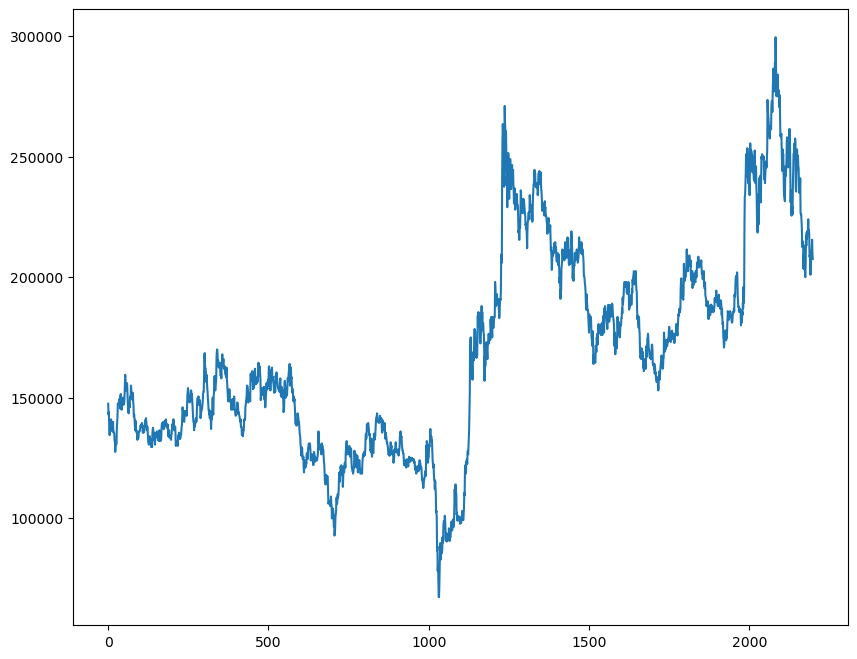

In [279]:
fig,axs = plt.subplots(1,1,figsize=(10,8))
axs = plt.plot(df["Open"])



**checking features distributions**

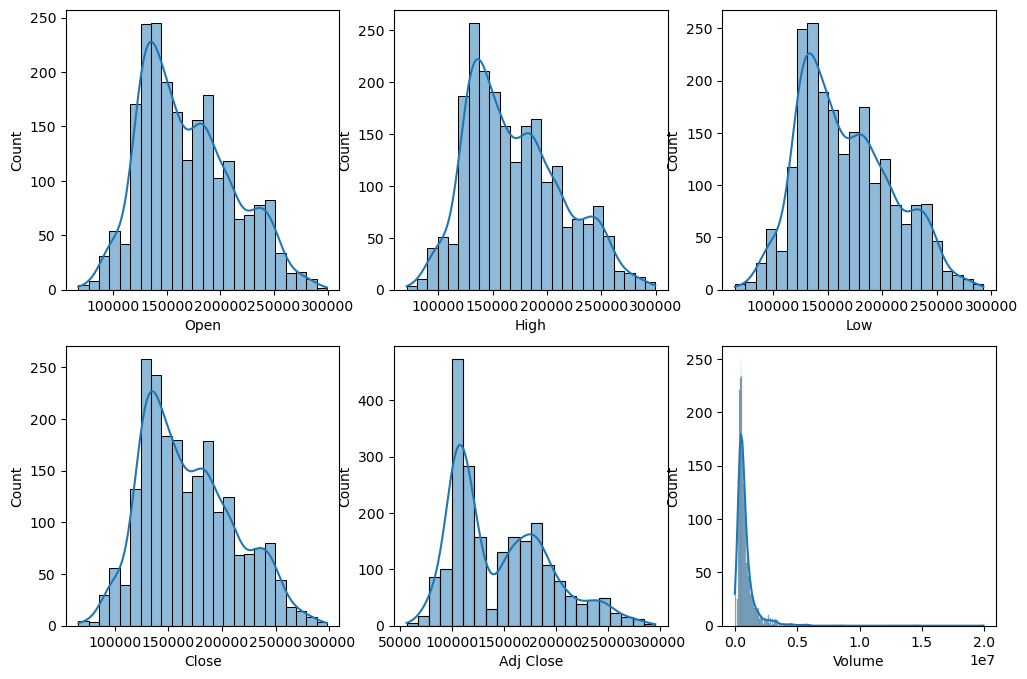

In [5]:
fig,axes = plt.subplots(2,3,figsize=(12,8))
for i , cols in enumerate(["Open","High","Low"]):
     sns.histplot(df[cols],ax=axes[0,i],kde =True)
for i , cols in enumerate(["Close","Adj Close","Volume"]):
    sns.histplot(df[cols],ax=axes[1,i],kde =True)

**outlier detection**

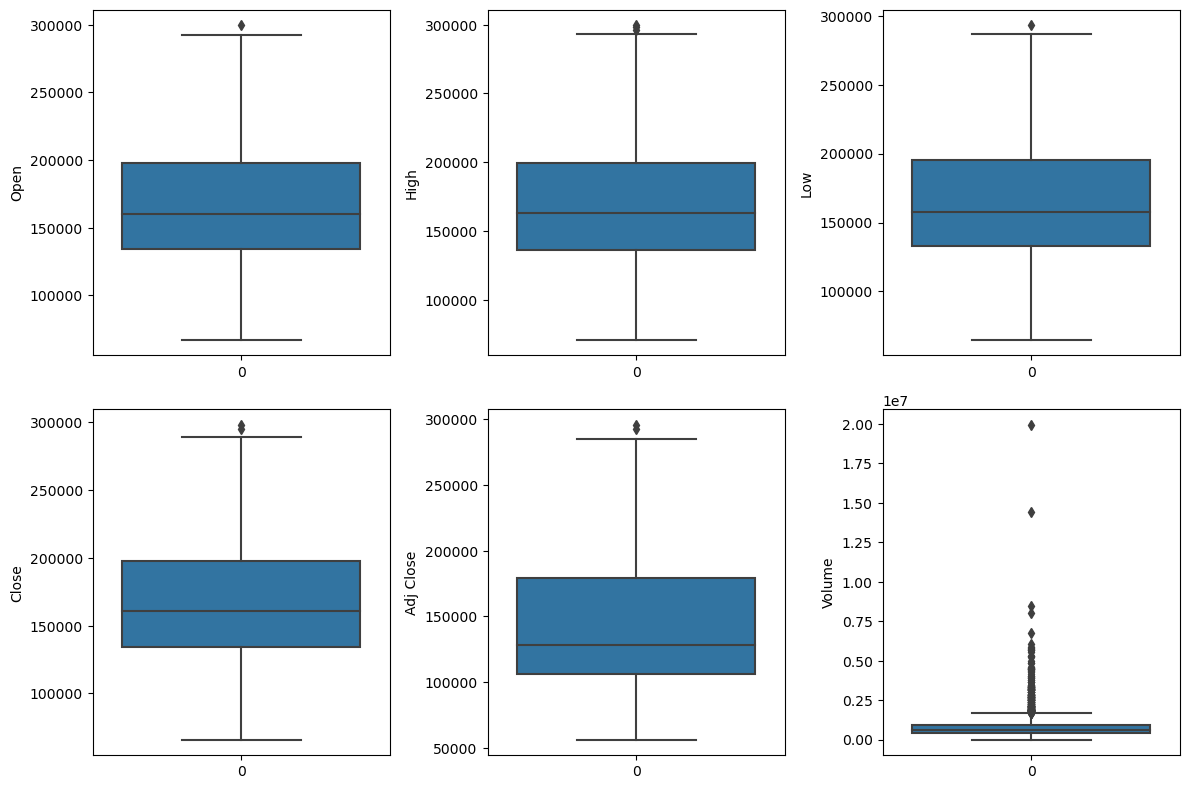

In [6]:
fig,axes = plt.subplots(2,3,figsize=(12,8))
for i , cols in enumerate(["Open","High","Low"]):
    sns.boxplot(df[cols],ax=axes[0,i])
    axes[0,i].set_ylabel(cols)
for i , cols in enumerate(["Close","Adj Close","Volume"]):
    sns.boxplot(df[cols],ax=axes[1,i])
    axes[1,i].set_ylabel(cols)
plt.tight_layout()

open and high have the lowest number of outliers and they have similar distribution therefore they are good candinates for features

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

df["Day"] = df["Date"].dt.day
df["month"] = df["Date"].dt.month
df["year"] = df["Date"].dt.year
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day,month,year
0,2016-01-04,147500.0,148000.0,143500.0,144000.0,109247.695312,445332,4,1,2016
1,2016-01-05,143000.0,145000.0,142000.0,143500.0,108868.359375,530496,5,1,2016
2,2016-01-06,144000.0,145000.0,139000.0,140000.0,106213.031250,769406,6,1,2016
3,2016-01-07,138500.0,140000.0,137500.0,137500.0,104316.367188,586187,7,1,2016
4,2016-01-08,134500.0,138000.0,133500.0,136500.0,103557.703125,888701,8,1,2016


In [8]:
df["earnings_report_month"] = np.where(df["month"] % 3 == 0, 1, 0)
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Day,month,year,earnings_report_month
2194,2024-12-12,210500.0,213000.0,209500.0,211500.0,211500.0,625351,12,12,2024,1
2195,2024-12-13,212000.0,216000.0,209000.0,215000.0,215000.0,528172,13,12,2024,1
2196,2024-12-16,215500.0,216000.0,210500.0,211000.0,211000.0,469448,16,12,2024,1
2197,2024-12-17,210000.0,212500.0,205500.0,206500.0,206500.0,715553,17,12,2024,1
2198,2024-12-18,207500.0,217000.0,207500.0,216500.0,216500.0,743141,18,12,2024,1


**check if earnings report affects the stock price**

In [9]:
df.drop("Date",axis=1,inplace=True)

mean = df.groupby("earnings_report_month").mean()
mean

,Open,High,Low,Close,Adj Close,Volume,Day,month,year
earnings_report_month,,,,,,,,,
0,168091.807718,170389.844279,165861.475965,168061.27285,146067.314637,872712.603250,16.075829,6.071090,2020.007448
1,169144.321330,171248.476454,167121.329640,169134.34903,146804.236290,814630.198061,15.662050,7.362881,2019.954294


In [10]:
df.to_csv(r"C:\Users\abdul\Desktop\my project\hyundai stocks\dataset")


**Data normalization and Data split**

In [51]:
X = np.genfromtxt(r"C:\Users\abdul\Desktop\my project\hyundai stocks\dataset",delimiter=",",skip_header=1)
train_x = torch.from_numpy(X[:1501,1]).float()
test_x = torch.from_numpy(X[1500:2100,1]).float()
valid_x = torch.from_numpy(X[2100:,1]).float()


# datapoints
xtrain = []
ytrain = []
xvalid = []
yvalid = []
xtest = []
ytest = []
window = 5

for i in range(len(train_x)-window):
    xtrain.append(train_x[i:i+window])
    ytrain.append(train_x[i+window])
    
#xvalidation and yvalidation 
for i in range(len(valid_x)-window):
    xvalid.append(valid_x[i:i+window])
    yvalid.append(valid_x[i+window])

#xtest and yytest
for i in range(len(test_x)-window):
    xtest.append(test_x[i:i+window])
    ytest.append(test_x[i+window])
    


xtrain = torch.stack(xtrain).float()
xtest = torch.stack(xtest).float()
xvalid = torch.stack(xvalid).float()
xtrain = xtrain.unsqueeze_(-1) #Add an extra dimension: (batch_size,seq_len, 1)
xtest = xtest.unsqueeze_(-1) #Add an extra dimension: (batch_size,seq, 1)
xvalid = xvalid.unsqueeze(-1)

ytrain = torch.tensor(ytrain)
ytest= torch.tensor(ytest)
yvalid = torch.tensor(yvalid)
ytrain = ytrain.unsqueeze(1)  # Add an extra dimension: (batch_size, 1)
ytest = ytest.unsqueeze(1) #Add an extra dimension: (batch_size, 1)
yvalid = yvalid.unsqueeze(1)



min_x = xtrain.min()
max_x = xtrain.max()

xtrain = (xtrain - min_x) / (max_x - min_x)
xtest = (xtest - min_x) / (max_x - min_x)
ytrain = (ytrain - min_x) / (max_x - min_x)
ytest = (ytest - min_x) / (max_x - min_x)
xvalid = (xvalid-min_x)/(max_x - min_x)
yvalid = (yvalid-min_x)/(max_x - min_x)




print(f"Training feature shape :{xtrain.size()}")
print(f"Training label :{ytrain.size()}")

Training feature shape :torch.Size([1496, 5, 1])
Training label :torch.Size([1496, 1])


In [203]:
import torch.nn as nn 
import torch.optim as optim
import torch.utils.data as data

torch.manual_seed(123)
class pred_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1=nn.LSTM(input_size = 1,hidden_size =64,num_layers =2,batch_first=True)
        self.linear_layer = nn.Linear(64,1)
    def forward(self,x):
        x,_ = self.l1(x) # generated hidden state (x) and lstm cell's memory and hidden states
        x = x[:,-1,:] 
        x =self.linear_layer(x)
        return x
    
        

In [204]:
model = pred_model()
model

pred_model(
  (l1): LSTM(1, 64, num_layers=2, batch_first=True)
  (linear_layer): Linear(in_features=64, out_features=1, bias=True)
)

In [205]:
from torch.utils.data import DataLoader
from torch.utils.data import Dataset


torch.manual_seed(123)
train_loader = DataLoader(data.TensorDataset(xtrain, ytrain), shuffle=False, batch_size=64)
test_loader = DataLoader(data.TensorDataset(xtest,ytest),shuffle = False,batch_size = 64)
valid_loader = DataLoader(data.TensorDataset(xvalid,yvalid),shuffle = False ,batch_size = 64)

for x, y in (train_loader):
    print(x.shape)
    print(y.shape)
    break


torch.Size([64, 5, 1])
torch.Size([64, 1])


Epoch 0: Mean Training Loss = 0.0005
Epoch 0: test Loss = 0.0011
Epoch 1: Mean Training Loss = 0.0003
Epoch 1: test Loss = 0.0004
Epoch 2: Mean Training Loss = 0.0003
Epoch 2: test Loss = 0.0005
Epoch 3: Mean Training Loss = 0.0003
Epoch 3: test Loss = 0.0004
Epoch 4: Mean Training Loss = 0.0003
Epoch 4: test Loss = 0.0004
Epoch 5: Mean Training Loss = 0.0003
Epoch 5: test Loss = 0.0004
Epoch 6: Mean Training Loss = 0.0003
Epoch 6: test Loss = 0.0004
Epoch 7: Mean Training Loss = 0.0003
Epoch 7: test Loss = 0.0004


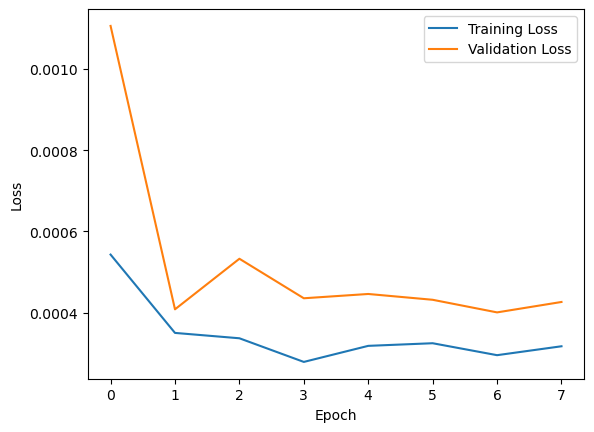

In [273]:
import torch
from torch import optim

torch.manual_seed(123)


n_epochs = 8
loss_fn = torch.nn.MSELoss()
optimizer = optim.Adam(model.parameters())
tr_loss = []
test_loss = []


for epoch in range(n_epochs):
    model.train()
    epoch_loss = 0
    num_batches = len(train_loader)
    for X_batch, y_batch in (train_loader):
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    mean_epoch_loss = epoch_loss / num_batches
    tr_loss.append(mean_epoch_loss)
    print(f"Epoch {epoch}: Mean Training Loss = {mean_epoch_loss:.4f}")


    #testing
    model.eval()
    with torch.no_grad():
        epoch_loss = 0.0
        num_batches = len(test_loader)
        
        for X_test, y_test in test_loader:
            y_pred = model(X_test)
            loss = loss_fn(y_pred, y_test).item()
            epoch_loss += loss
        
        avg_test_loss = epoch_loss / num_batches
        test_loss.append(avg_test_loss) 
        print(f"Epoch {epoch}: test Loss = {avg_test_loss:.4f}")


plt.plot(tr_loss, label='Training Loss')
plt.plot(test_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


**validating the model**

In [274]:
#validation 
model.eval()
loss_fn = nn.MSELoss()
num_batches = len(valid_loader)
with torch.no_grad():
    validation_loss = 0.0
    for i , (X_batch,y_batch) in enumerate(valid_loader):
        y = model(X_batch)
        loss = loss_fn(y,y_batch)
        validation_loss += loss
    avg_validation_loss = validation_loss/num_batches
    print(f"validation loss:{avg_validation_loss}")

validation loss:0.0008188150823116302


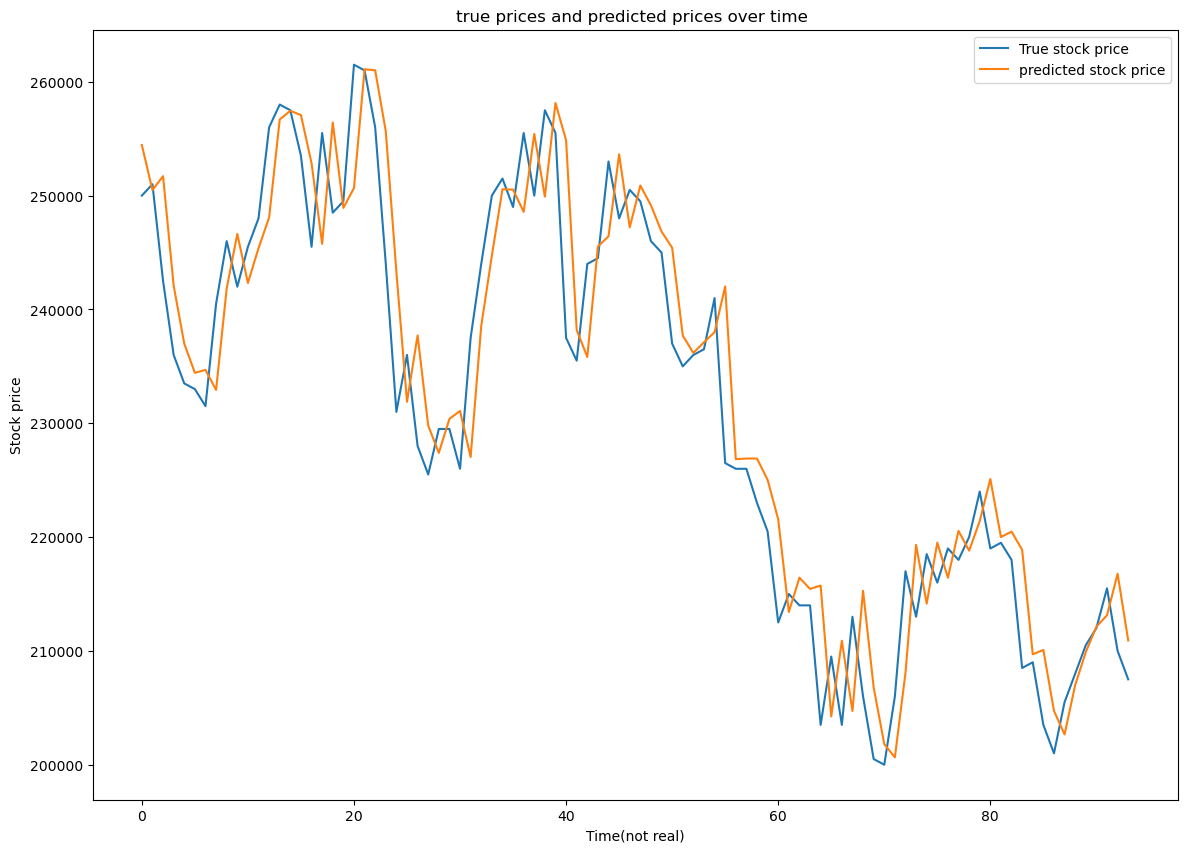

In [275]:
model.eval()
predicted_stock_price = []
with torch.no_grad():
    for i in xvalid:
        y = model(i.unsqueeze(0))
        predicted_stock_price.append(y.item()*(max_x - min_x)+min_x) # rescaling predictions
        
true_values = yvalid
true_y =[]
for i in true_values:
    i = i *(max_x - min_x) + min_x  # rescaling true values
    true_y.append(i.numpy())
    
true_y = np.reshape(true_y,(1,94))

fig,ax = plt.subplots(1,1,figsize=(14,10))
ax.plot(true_y[0],label = "True stock price")
ax.plot(predicted_stock_price,label="predicted stock price")
ax.set_title("true prices and predicted prices over time ")
ax.set_ylabel("Stock price")
ax.set_xlabel("Time(not real)")
ax.legend()








**saving the model**

In [276]:
torch.save(model,r"C:\Users\abdul\Desktop\my project\hyundai stocks\model.pth")